### Imports

In [2]:
#Scikitlearn
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn import decomposition,svm

#Math
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from numpy.random import RandomState

#Image processing
from PIL import Image
import cv2

## Dataset de las caras

Vamos a utilizar las olivetti faces de scikit learn para generar nuestra base, esta cuenta con un total de 400 imagenes de 64x64 pixeles. 

In [48]:
#Rng simplemente para cambiar el estado del modelo cada vez que se ejecuta de 0
rng = RandomState(0)

faces, faces_group = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

Este dataset contiene un total de: 400 imagenes de 64x64


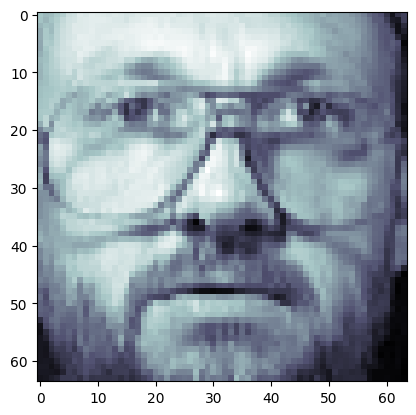

In [49]:
print('Este dataset contiene un total de:',n_samples,"imagenes de 64x64")

# Modificamos el tamaño del vector para formar la imagen y luego poder visualizarla
testing = faces[0].reshape(64,64)
imshow(np.asarray(testing),cmap=plt.cm.bone);

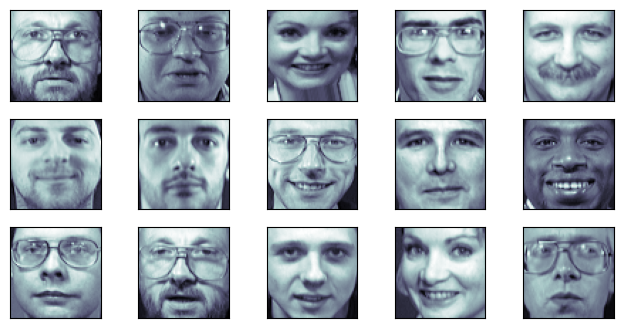

In [50]:
# Algunas otras caras que se encuentran en el dataset

fig = plt.figure(figsize=(8, 4))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces[i].reshape(64,64), cmap=plt.cm.bone)

## PCA


PCA significa Análisis de Componentes Principales. Es una técnica de reducción de dimensionalidad comúnmente utilizada en análisis de datos y aprendizaje automático. PCA nos permite transformar un conjunto de datos de alta dimensionalidad en una representación de menor dimensión mientras se conserva la información o patrones más importantes presentes en los datos.

Además de la reducción de dimensionalidad, PCA también puede ayudar a detectar relaciones lineales y correlaciones entre variables en el conjunto de datos. Al eliminar la redundancia y la multicolinealidad, PCA puede simplificar y mejorar el rendimiento de los modelos de aprendizaje automático, así como ayudar en la visualización y exploración de datos complejos.

In [75]:
# Creamos nuestro conjunto de entrenamiento y prueba 

X_train, X_test, y_train, y_test = train_test_split(faces,
        faces_group, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


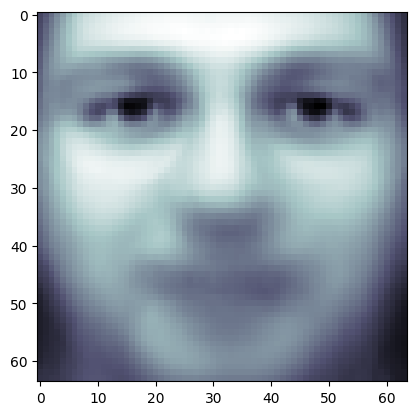

In [76]:
# Usamos PCA con nuestro Dataset
n_components = 100
pca = decomposition.PCA(n_components, whiten=True)
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(64,64), cmap=plt.cm.bone)

### Eigenfaces

Mientras que tenemos más de 20 eigenfaces vamos a mostrar solo esta cantidad para hacernos una idea de qué sucede al utilizar PCA.

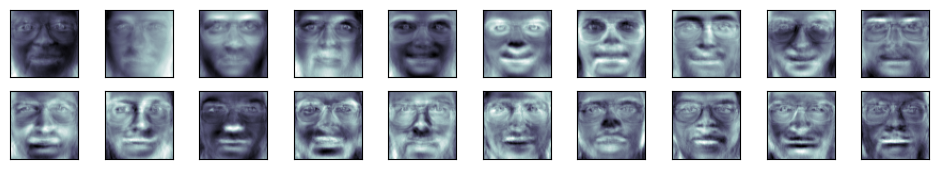

In [85]:
# Las primeras 20 eigenfaces contenidas en la matriz del PCA

fig = plt.figure(figsize=(12, 3))
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(64,64),cmap=plt.cm.bone)

## Representación del rostro

Vamos a utilizar ahora una fotografía en el formato más similar posible al de los rostros para poder calcular los eigenrostros que mejor lo representan.

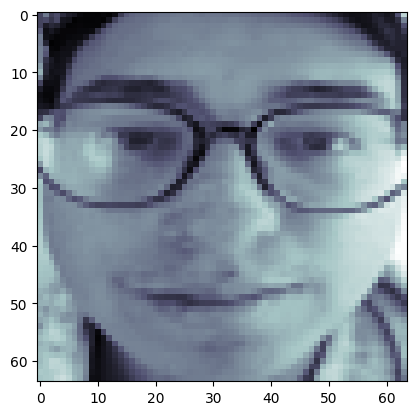

In [78]:
# Tenemos que dejar la imagen en la msiam resolución que las del Dataset
image = Image.open('resha.jpeg').resize((64,64))
image_numpy = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY).flatten()

imshow(np.asarray(image_numpy.reshape(64,64)),cmap=plt.cm.bone);

Para realizar la proyección del rostro vamos a utilizar un algoritmo, pues debido al tamaño de las imagenes y de la base realizar el calculo matricial podría tardar

La proyección es: 
 [-7662.9565, -606.05896, -640.0131, 1361.3754, 1754.5382, 170.40454, -796.9799, -23.07614, -478.91724, 368.4165, 635.7317, -232.83229, -69.16457, 529.28827, 393.4905, -31.595911, -550.65594, 746.1766, -522.7991, -62.49501, 18.37896, -96.03556, 162.28606, 23.514437, -230.85262, 302.2885, 256.0395, -10.030142, 639.2723, -310.1973, -180.52132, 80.551704, -596.1981, 27.852291, -65.23825, 68.36225, 448.46262, -104.855995, 130.76956, 52.843975, -260.97598, -172.24944, 157.10347, -224.39581, -122.595505, 186.21646, -60.297676, 104.594925, -65.14852, 155.86789, -248.22748, -50.46752, 70.76018, -7.1610827, -244.66971, 230.85219, -265.94238, -207.64867, 53.427444, 15.401088, 79.90348, 80.35004, 43.221287, -135.59848, 18.17789, -22.41829, 49.84272, 235.30759, 255.51892, 19.421232, 340.90887, 1.8248887, 121.255295, 134.50822, -130.12245, 215.20569, -169.28917, -82.05111, 79.41676, -111.55178, -60.94932, 43.020958, -10.885707, -44.659996, -42.487278, 259.1926, -49.633633, -111.8

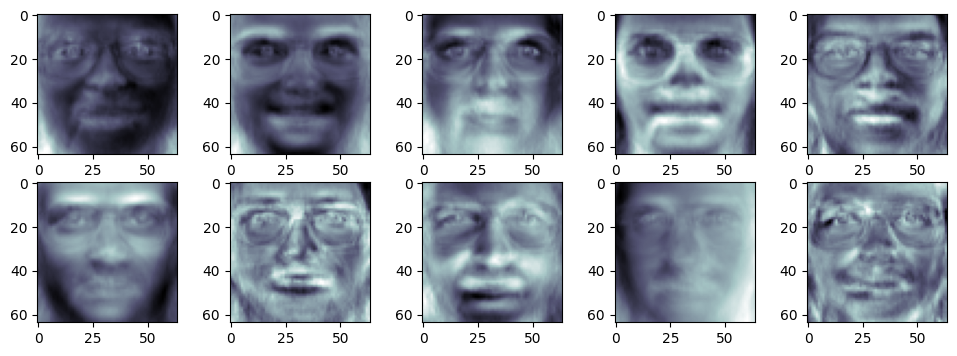

In [92]:
# Promediamos la base y calculamos su diferencia con respecto a la imagen
mean_face = pca.mean_
diff_face = image_numpy - mean_face

#Ahora hacemos la proyección del rostro en la base
projection = []
for i in range(n_components):
   projection.append(np.dot(diff_face, pca.components_[i]))
print('La proyección es: \n', projection)

# Veamos los 10 elementos de la base que tienen más peso
base_info = {i:abs(projection[i]) for i in range(0,len(projection)) }
sorted_base = {k: v for k, v in sorted(base_info.items(),key=lambda item: item[1],reverse=True)}

print("Las Eigenfaces con más pesos son: \n",sorted_base)

fig, axes = plt.subplots(2, 5, figsize=(12, 4))
data = list(sorted_base.keys())[0:10]
for i in range(0,10):
  imagen = pca.components_[data[i]].reshape(64,64)
  axes[i // 5, i % 5].imshow(imagen, cmap=plt.cm.bone)

Ahora teniendo en cuenta que ya calculamos la reconstrucción de la imagen con nuestra base, podemos visualizarla

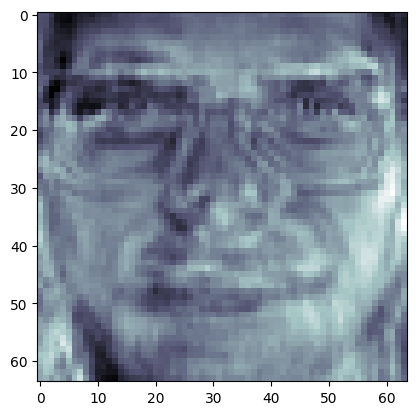

In [94]:
# Hacemos la reconstrucción con la proyección
for i in range(n_components):
  mean_face  = mean_face  + projection[i]*pca.components_[i]
imshow(mean_face.reshape(64,64),cmap=plt.cm.bone);